In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PLGA/DMSO system analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_plga_dmso = mda.Universe("n6plga_dmso/n6plgaonly_dmso.pdb", "n6plga_dmso/nodmso_n6plga.xtc")

In [6]:
n6_plga_dmso.trajectory

<XTCReader n6plga_dmso/nodmso_n6plga.xtc with 18001 frames of 93 atoms>

In [7]:
len(n6_plga_dmso.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
plga_n6dmso = n6_plga_dmso.select_atoms("resname sPLG PLG tPLG and not type H")

In [9]:
crv_n6plga_dmso = pers_length(plga_n6dmso,6)
crv_n6plga_dmso

array([[ 1.        ,  0.80543454,  0.76197218,  0.83473776,  0.7752539 ],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        , 36.34775799, 40.3616291 , 33.41145779, 39.17194194]])

In [10]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_plga_dmso.trajectory[0:18000]:
    n6_mon1_dmso = n6_plga_dmso.select_atoms("resid 1")
    n6_mon2_dmso = n6_plga_dmso.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1_dmso.center_of_mass(), n6_mon2_dmso.center_of_mass(), 
                                                   box=n6_plga_dmso.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [11]:
com_bond

array([[5.76474232, 6.12020808, 6.33092829, ..., 6.67174316, 6.9020669 ,
        6.7657957 ]])

In [12]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.736817192432176

In [13]:
np.std(com_bond)

0.6924626120263444

### Radius of Gyration vs. time N = 6 PLGA/DMSO system

In [14]:
n6plga_rgens_dmso, cor_n6plga_dmso, N6plga_cos_dmso, rgace_n6plga = get_rg_pers_poly(plga_n6dmso, n6_plga_dmso, 0, 18000)

In [15]:
n6plga_rgens_dmso[0].shape

(18000,)

In [16]:
cor_n6plga_dmso[3]

array([0., 1., 2., 3., 4.])

In [17]:
N6plga_cos_dmso

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.80543454, 0.79985918, 0.77751437, ..., 0.89666603, 0.88899318,
        0.9033569 ],
       [0.76197218, 0.75817455, 0.73101401, ..., 0.85472669, 0.81967793,
        0.87101018],
       [0.83473776, 0.82845572, 0.82326989, ..., 0.87836184, 0.85948937,
        0.8864767 ],
       [0.7752539 , 0.74466126, 0.7529875 , ..., 0.77419466, 0.75972394,
        0.86682854]])

In [18]:
rgace_n6plga

7.69155809534084

In [19]:
np.std(n6plga_rgens_dmso)

1.1023076127884581

In [20]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

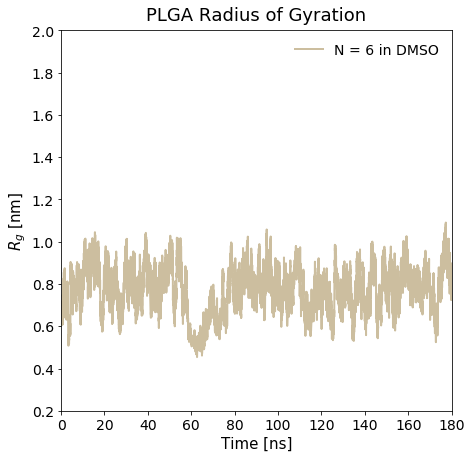

In [21]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_dmso[0]/10,linewidth=2, color='#CCBE9F')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PLGA/DMSO

In [22]:
# x values
blen_dmso = cor_n6plga_dmso[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_dmso

array([ 0.        ,  5.73681719, 11.47363438, 17.21045158, 22.94726877])

In [23]:
mk_n6p_dmso = cor_n6plga_dmso[1]/cor_n6plga_dmso[0]
mk_n6p_dmso

array([6.28146008e-17, 6.56965420e-02, 2.04714065e-01, 3.73513938e-01,
       6.52076924e-01])

<ErrorbarContainer object of 3 artists>

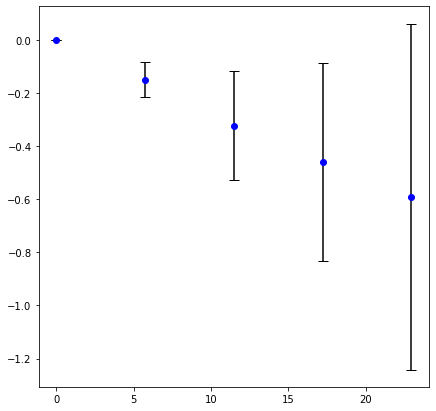

In [24]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [25]:
# All the points give the best fits for N = 6 peg in water
n6_blksplga_dmso , n6plga_lpdmso = bavg_pers_cnt(5, plga_n6dmso, n6_plga_dmso, lb_avg_pn6, 3, 3000 , 18000)

3000
6000
Lp [Angstroms]: 41.431109034536995
Error in Lp from fit [Angstroms], 95% CL : 1.5551263229689032
R2 score: 0.998333932968661
6000
9000
Lp [Angstroms]: 27.965706313474392
Error in Lp from fit [Angstroms], 95% CL : 1.818878178022168
R2 score: 0.9951042921637483
9000
12000
Lp [Angstroms]: 36.28842715203329
Error in Lp from fit [Angstroms], 95% CL : 3.195997168074304
R2 score: 0.9911911582950202
12000
15000
Lp [Angstroms]: 33.34827245802486
Error in Lp from fit [Angstroms], 95% CL : 3.077011830678994
R2 score: 0.9903656864411504
15000
18000
Lp [Angstroms]: 48.15232079572889
Error in Lp from fit [Angstroms], 95% CL : 2.9412127205537555
R2 score: 0.9952846466104291


In [26]:
n6_blksplga_dmso

{'Avg Radius of gyration': array([7.98939671, 6.97028936, 7.74972584, 7.56602891, 8.04548209]),
 'Avg persistence length': array([41.43110903, 27.96570631, 36.28842715, 33.34827246, 48.1523208 ])}

In [27]:
n6plga_lpdmso

array([[ 4.14311090e+01,  2.79657063e+01,  3.62884272e+01,
         3.33482725e+01,  4.81523208e+01],
       [ 1.55512632e+00,  1.81887818e+00,  3.19599717e+00,
         3.07701183e+00,  2.94121272e+00],
       [-2.41364526e-02, -3.57580813e-02, -2.75569948e-02,
        -2.99865608e-02, -2.07674310e-02],
       [ 2.18869780e-05,  1.44233036e-04,  1.57072763e-04,
         2.04138847e-04,  4.29086318e-05]])

In [28]:
n6plga_lpdmso[2]

array([-0.02413645, -0.03575808, -0.02755699, -0.02998656, -0.02076743])

In [29]:
np.mean(n6plga_lpdmso[3])

0.00011404805118309829

In [30]:
def line_fit(slope, x):
    return slope*x 

In [31]:
blen_dmso

array([ 0.        ,  5.73681719, 11.47363438, 17.21045158, 22.94726877])

In [32]:
gg_n6plga_dmso = line_fit(np.mean(n6plga_lpdmso[2]),blen_dmso)

In [33]:
gg_n6plga_dmso

array([-0.        , -0.15857196, -0.31714392, -0.47571588, -0.63428785])

### Block averaged Radius of gyration and persistence length, N = 6 PLGA/DMSO

In [34]:
np.mean(n6_blksplga_dmso["Avg persistence length"])

37.437167150759684

In [35]:
np.std(n6_blksplga_dmso["Avg persistence length"])

6.906711564724062

In [36]:
np.mean(n6_blksplga_dmso["Avg Radius of gyration"])

7.664184582428758

In [37]:
np.std(n6_blksplga_dmso["Avg Radius of gyration"])

0.3871932719988535

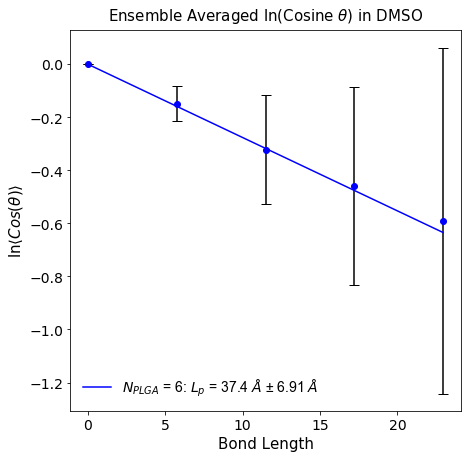

In [38]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_dmso, gg_n6plga_dmso, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in DMSO', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.legend([r'$N_{PLGA}$ = 6: $L_{p}$ = 37.4 $\AA$ ± 6.91 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [39]:
rgplga_olig_dmso =  pd.DataFrame(data=n6_blksplga_dmso["Avg Radius of gyration"], columns=['$R_{g}$ [Angstrom] N = 6 PLGA DMSO'])
rgplga_olig_dmso

,$R_{g}$ [Angstrom] N = 6 PLGA DMSO
0,7.989397
1,6.970289
2,7.749726
3,7.566029
4,8.045482


In [40]:
pers_plgat_dmso = pd.DataFrame(data=n6_blksplga_dmso["Avg persistence length"], columns=[r"$L_{p}$ [Angstrom] N = 6 PLGA DMSO "])
pers_plgat_dmso

,$L_{p}$ [Angstrom] N = 6 PLGA DMSO
0,41.431109
1,27.965706
2,36.288427
3,33.348272
4,48.152321


### N = 8 PLGA/DMSO only

In [41]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_plga_dmso = mda.Universe("n8plga_dmso/n8plgaonly_dmso.pdb", "n8plga_dmso/nodmso_n8plga.xtc")

In [42]:
n8_plga_dmso.trajectory

<XTCReader n8plga_dmso/nodmso_n8plga.xtc with 18001 frames of 123 atoms>

In [43]:
len(n8_plga_dmso.trajectory)

18001

In [44]:
#Select the polymer heavy atoms 
plga_n8dmso = n8_plga_dmso.select_atoms("resname sPLG PLG tPLG and not type H")

In [45]:
crv_n8plga_dmso = pers_length(plga_n8dmso,8)
crv_n8plga_dmso

array([[ 1.        ,  0.92202687,  0.8855667 ,  0.84712413,  0.81374987,
         0.79992193,  0.88121899],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ],
       [ 0.        , 22.77578122, 27.67865973, 32.0997624 , 35.53606078,
        36.87735181, 28.21023944]])

In [46]:
com_bond_n8dmso = np.zeros(shape=(1,18000))
count = 0
for ts in n8_plga_dmso.trajectory[0:18000]:
    n8_mon1_dmso = n8_plga_dmso.select_atoms("resid 1")
    n8_mon2_dmso = n8_plga_dmso.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1_dmso.center_of_mass(), n8_mon2_dmso.center_of_mass(), 
                                                   box=n8_plga_dmso.trajectory.ts.dimensions)
    com_bond_n8dmso[0, count] = oo_len
    count += 1
    

In [47]:
com_bond

array([[5.76474232, 6.12020808, 6.33092829, ..., 6.67174316, 6.9020669 ,
        6.7657957 ]])

In [48]:
np.std(com_bond)

0.6924626120263444

In [49]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.736817192432176

In [50]:
np.mean(com_bond_n8dmso)

5.808857380493631

In [51]:
np.std(com_bond_n8dmso)

0.6853297603652814

### Radius of Gyration vs. time N = 8 PLGA/DMSO system

In [52]:
n8plga_rgens_dmso, cor_n8plga_dmso, N8plga_cos_dmso, rgace_n8plga = get_rg_pers_poly(plga_n8dmso, n8_plga_dmso, 0, 18000)

In [53]:
n8plga_rgens_dmso[0].shape

(18000,)

In [54]:
cor_n8plga_dmso[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [55]:
N8plga_cos_dmso

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.92202687,  0.91718924,  0.89498727, ...,  0.78724553,
         0.76976871,  0.82054554],
       [ 0.8855667 ,  0.87692283,  0.8567479 , ...,  0.52893115,
         0.5151239 ,  0.56213736],
       ...,
       [ 0.81374987,  0.8551739 ,  0.83804701, ...,  0.34808329,
         0.47264132,  0.38214751],
       [ 0.79992193,  0.87689938,  0.84350289, ..., -0.15807919,
        -0.08824616, -0.12180612],
       [ 0.88121899,  0.92621639,  0.86602435, ..., -0.52082638,
        -0.51802202, -0.45502845]])

In [56]:
rgace_n8plga

8.916496948834338

In [57]:
np.std(n8plga_rgens_dmso)

1.5910936332951087

(0.2, 2)

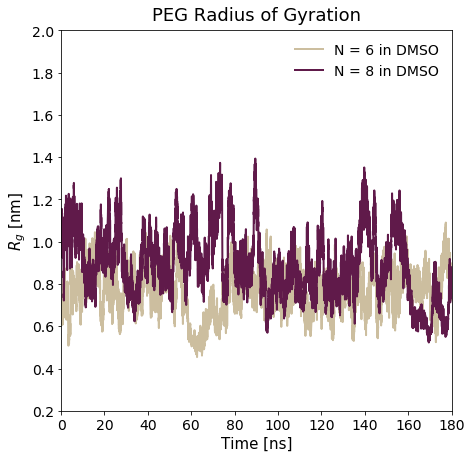

In [58]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_dmso[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_dmso[0]/10,linewidth=2, color='#601A4A')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in DMSO','N = 8 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PLGA/DMSO

In [59]:
# x values
blen_n8dmso = cor_n8plga_dmso[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n8dmso

array([ 0.        ,  5.73681719, 11.47363438, 17.21045158, 22.94726877,
       28.68408596, 34.42090315])

In [60]:
mk_n8p_dmso = cor_n8plga_dmso[1]/cor_n8plga_dmso[0]
mk_n8p_dmso

array([4.10348870e-17, 6.12018903e-02, 1.93562617e-01, 3.37928823e-01,
       4.45238066e-01, 6.75470527e-01, 1.22368705e+00])

<ErrorbarContainer object of 3 artists>

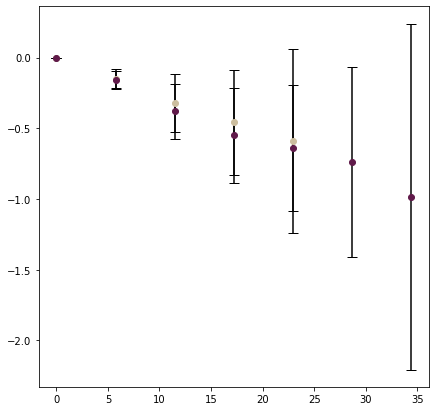

In [61]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [62]:
# All the points give the best fits for N = 6 peg in water
n8_blksplga_dmso , n8plga_lpdmso = bavg_pers_cnt(5, plga_n8dmso, n8_plga_dmso, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 31.995460121299896
Error in Lp from fit [Angstroms], 95% CL : 0.7152091434070462
R2 score: 0.998309548983287
6000
9000
Lp [Angstroms]: 39.314314683233206
Error in Lp from fit [Angstroms], 95% CL : 1.1571235123858041
R2 score: 0.9971415114534102
9000
12000
Lp [Angstroms]: 29.332022357957623
Error in Lp from fit [Angstroms], 95% CL : 2.9881212654986378
R2 score: 0.963822711742932
12000
15000
Lp [Angstroms]: 31.320345409422707
Error in Lp from fit [Angstroms], 95% CL : 1.2687628927558166
R2 score: 0.9944794201812682
15000
18000
Lp [Angstroms]: 21.915797703230478
Error in Lp from fit [Angstroms], 95% CL : 1.8934774608079379
R2 score: 0.9778119714247109


In [63]:
n8_blksplga_dmso

{'Avg Radius of gyration': array([8.97019451, 9.8191663 , 8.29336145, 8.91247409, 7.76694334]),
 'Avg persistence length': array([31.99546012, 39.31431468, 29.33202236, 31.32034541, 21.9157977 ])}

In [64]:
n8plga_lpdmso

array([[ 3.19954601e+01,  3.93143147e+01,  2.93320224e+01,
         3.13203454e+01,  2.19157977e+01],
       [ 7.15209143e-01,  1.15712351e+00,  2.98812127e+00,
         1.26876289e+00,  1.89347746e+00],
       [-3.12544341e-02, -2.54360278e-02, -3.40924328e-02,
        -3.19281281e-02, -4.56291856e-02],
       [ 6.93921886e-05,  7.96809509e-05,  1.71485071e-03,
         2.37822355e-04,  2.20947482e-03]])

In [65]:
n8plga_lpdmso[2]

array([-0.03125443, -0.02543603, -0.03409243, -0.03192813, -0.04562919])

In [66]:
np.mean(n8plga_lpdmso[3])

0.0008622442049330905

In [67]:
blen_n8dmso

array([ 0.        ,  5.73681719, 11.47363438, 17.21045158, 22.94726877,
       28.68408596, 34.42090315])

In [68]:
gg_n8plga_dmso = line_fit(np.mean(n8plga_lpdmso[2]),blen_n8dmso)

In [69]:
gg_n6plga_n8dmso = line_fit(np.mean(n6plga_lpdmso[2]),blen_n8dmso)

In [70]:
gg_n8plga_dmso

array([-0.       , -0.1931474, -0.3862948, -0.5794422, -0.7725896,
       -0.965737 , -1.1588844])

### Block averaged Radius of gyration and persistence length, N = 8 PLGA/DMSO

In [71]:
np.mean(n8_blksplga_dmso["Avg persistence length"])

30.775588055028784

In [72]:
np.std(n8_blksplga_dmso["Avg persistence length"])

5.572691770841466

In [73]:
np.mean(n8_blksplga_dmso["Avg Radius of gyration"])

8.75242793711924

In [74]:
np.std(n8_blksplga_dmso["Avg Radius of gyration"])

0.6917932804889285

Text(0.5, -6.54, '$N_{PLGA}$ = 8: $L_{p}$ = 30.8 $\\AA$ ± 5.57 $\\AA$')

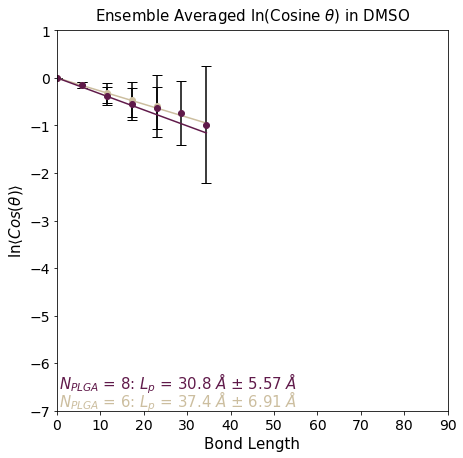

In [75]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8dmso, gg_n6plga_n8dmso, color='#CCBE9F')
plt.plot(blen_n8dmso, gg_n8plga_dmso, color='#601A4A')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in DMSO', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,90)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 37.4 $\AA$ ± 6.91 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.8 $\AA$ ± 5.57 $\AA$', fontsize=15, color='#601A4A')

In [76]:
rgplga_olig_dmso[r"$R_{g}$ [Angstrom] N = 8 PLGA DMSO"] = n8_blksplga_dmso["Avg Radius of gyration"]
rgplga_olig_dmso

,$R_{g}$ [Angstrom] N = 6 PLGA DMSO,$R_{g}$ [Angstrom] N = 8 PLGA DMSO
0,7.989397,8.970195
1,6.970289,9.819166
2,7.749726,8.293361
3,7.566029,8.912474
4,8.045482,7.766943


In [77]:
pers_plgat_dmso[r"$L_{p}$ [Angstrom] N = 8 PLGA DMSO "] = n8_blksplga_dmso["Avg persistence length"]
pers_plgat_dmso

,$L_{p}$ [Angstrom] N = 6 PLGA DMSO,$L_{p}$ [Angstrom] N = 8 PLGA DMSO
0,41.431109,31.995460
1,27.965706,39.314315
2,36.288427,29.332022
3,33.348272,31.320345
4,48.152321,21.915798


### N = 10 PLGA/DMSO

In [78]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_plga_dmso = mda.Universe("n10plga_dmso/n10plgaonly_dmso.pdb", "n10plga_dmso/nodmso_n10plga.xtc")

In [79]:
n10_plga_dmso.trajectory

<XTCReader n10plga_dmso/nodmso_n10plga.xtc with 18001 frames of 153 atoms>

In [80]:
len(n10_plga_dmso.trajectory)

18001

In [81]:
#Select the polymer heavy atoms 
plga_n10dmso = n10_plga_dmso.select_atoms("resname sPLG PLG tPLG and not type H")

In [82]:
crv_n10plga_dmso = pers_length(plga_n10dmso,10)
crv_n10plga_dmso

array([[ 1.        ,  0.92263761,  0.89208551,  0.82140625,  0.79290299,
         0.70065832,  0.73053748,  0.60743444,  0.74727778],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ],
       [ 0.        , 22.68521966, 26.86350741, 34.77418667, 37.54236548,
        45.5201554 , 43.06852809, 52.59577357, 41.64488218]])

In [83]:
com_bond_n10dmso = np.zeros(shape=(1,18000))
count = 0
for ts in n10_plga_dmso.trajectory[0:18000]:
    n10_mon1_dmso = n10_plga_dmso.select_atoms("resid 1")
    n10_mon2_dmso = n10_plga_dmso.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1_dmso.center_of_mass(), n10_mon2_dmso.center_of_mass(), 
                                                   box=n10_plga_dmso.trajectory.ts.dimensions)
    com_bond_n10dmso[0, count] = oo_len
    count += 1
    

In [84]:
com_bond

array([[5.76474232, 6.12020808, 6.33092829, ..., 6.67174316, 6.9020669 ,
        6.7657957 ]])

In [85]:
np.std(com_bond)

0.6924626120263444

In [86]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.736817192432176

In [87]:
np.mean(com_bond_n10dmso)

5.783500713600267

In [88]:
np.std(com_bond_n10dmso)

0.6706714558713213

### Radius of Gyration vs. time N = 10 PLGA/DMSO system

In [89]:
n10plga_rgens_dmso, cor_n10plga_dmso, N10plga_cos_dmso, rgace_n10plga = get_rg_pers_poly(plga_n10dmso, n10_plga_dmso, 0, 18000)

In [90]:
n10plga_rgens_dmso[0].shape

(18000,)

In [91]:
cor_n10plga_dmso[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [92]:
N10plga_cos_dmso

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.92263761, 0.88057349, 0.90636949, ..., 0.83514819, 0.81765557,
        0.84211449],
       [0.89208551, 0.84868506, 0.86128795, ..., 0.60708374, 0.58901238,
        0.59514558],
       ...,
       [0.73053748, 0.61649558, 0.64240054, ..., 0.18427866, 0.3039698 ,
        0.32018046],
       [0.60743444, 0.34332263, 0.42525548, ..., 0.37468305, 0.47566245,
        0.5034484 ],
       [0.74727778, 0.69058214, 0.63957695, ..., 0.9382682 , 0.97482453,
        0.95013284]])

In [93]:
rgace_n10plga

9.71814576184855

In [94]:
np.std(n10plga_rgens_dmso)

1.980740703932362

(0.2, 2)

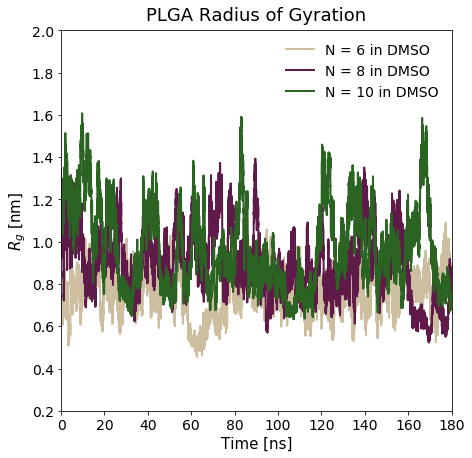

In [95]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_dmso[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_dmso[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_dmso[0]/10,linewidth=2, color='#2B6322')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in DMSO','N = 8 in DMSO','N = 10 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 10 PLGA/DMSO

In [96]:
# x values
blen_n10dmso = cor_n10plga_dmso[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n10dmso

array([ 0.        ,  5.73681719, 11.47363438, 17.21045158, 22.94726877,
       28.68408596, 34.42090315, 40.15772035, 45.89453754])

In [97]:
mk_n10p_dmso = cor_n10plga_dmso[1]/cor_n10plga_dmso[0]
mk_n10p_dmso

array([4.10765849e-17, 5.00090482e-02, 1.49722568e-01, 2.72971717e-01,
       4.76525850e-01, 7.06352001e-01, 9.81440424e-01, 1.19842606e+00,
       1.30557540e+00])

<ErrorbarContainer object of 3 artists>

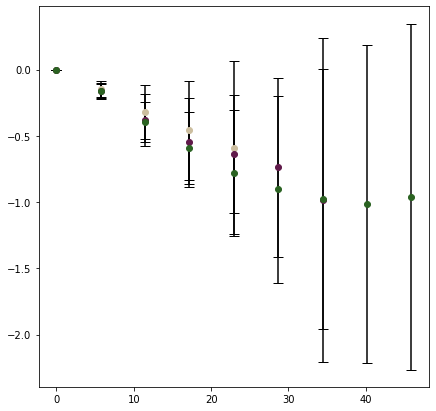

In [98]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10dmso, np.log(cor_n10plga_dmso[0]), yerr=mk_n10p_dmso, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [99]:
# All the points give the best fits for N = 10 plga in DMSO
n10_blksplga_dmso , n10plga_lpdmso = bavg_pers_cnt(5, plga_n10dmso, n10_plga_dmso, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 25.066872668682073
Error in Lp from fit [Angstroms], 95% CL : 1.2736312957891436
R2 score: 0.9859469418199795
6000
9000
Lp [Angstroms]: 26.036077079979467
Error in Lp from fit [Angstroms], 95% CL : 1.1208646284972443
R2 score: 0.9896440671704613
9000
12000
Lp [Angstroms]: 23.352690885577935
Error in Lp from fit [Angstroms], 95% CL : 0.7714669738705072
R2 score: 0.9936388412148563
12000
15000
Lp [Angstroms]: 36.54148744597157
Error in Lp from fit [Angstroms], 95% CL : 1.8863180898085412
R2 score: 0.9827800277931686
15000
18000
Lp [Angstroms]: 29.15736253556648
Error in Lp from fit [Angstroms], 95% CL : 0.7379322832071493
R2 score: 0.9962294898016291


In [100]:
n10_blksplga_dmso

{'Avg Radius of gyration': array([ 9.07877775,  9.65222904,  8.06938967, 10.53514759,  9.70161125]),
 'Avg persistence length': array([25.06687267, 26.03607708, 23.35269089, 36.54148745, 29.15736254])}

In [101]:
n10plga_lpdmso

array([[ 2.50668727e+01,  2.60360771e+01,  2.33526909e+01,
         3.65414874e+01,  2.91573625e+01],
       [ 1.27363130e+00,  1.12086463e+00,  7.71466974e-01,
         1.88631809e+00,  7.37932283e-01],
       [-3.98932892e-02, -3.84082440e-02, -4.28216176e-02,
        -2.73661547e-02, -3.42966549e-02],
       [ 1.68392171e-03,  1.12057056e-03,  8.20204273e-04,
         8.17937360e-04,  3.08798475e-04]])

In [102]:
n10plga_lpdmso[2]

array([-0.03989329, -0.03840824, -0.04282162, -0.02736615, -0.03429665])

In [103]:
np.mean(n10plga_lpdmso[3])

0.000950286475341779

In [104]:
blen_n10dmso

array([ 0.        ,  5.73681719, 11.47363438, 17.21045158, 22.94726877,
       28.68408596, 34.42090315, 40.15772035, 45.89453754])

In [105]:
gg_n10plga_dmso = line_fit(np.mean(n10plga_lpdmso[2]),blen_n10dmso)

In [106]:
gg_n6plga_n10dmso = line_fit(np.mean(n6plga_lpdmso[2]),blen_n10dmso)

In [107]:
gg_n8plga_n10dmso = line_fit(np.mean(n8plga_lpdmso[2]),blen_n10dmso)

In [108]:
gg_n10plga_dmso

array([-0.        , -0.20972193, -0.41944386, -0.62916578, -0.83888771,
       -1.04860964, -1.25833157, -1.4680535 , -1.67777542])

### Block averaged Radius of gyration and persistence length, N = 10 PLGA/DMSO

In [109]:
np.mean(n10_blksplga_dmso["Avg persistence length"])

28.030898123155502

In [110]:
np.std(n10_blksplga_dmso["Avg persistence length"])

4.6550925563483

In [111]:
np.mean(n10_blksplga_dmso["Avg Radius of gyration"])

9.407431060734757

In [112]:
np.std(n10_blksplga_dmso["Avg Radius of gyration"])

0.8144421867614653

Text(0.5, -6.2, '$N_{PLGA}$ = 10: $L_{p}$ = 28.0 $\\AA$ ± 4.66 $\\AA$')

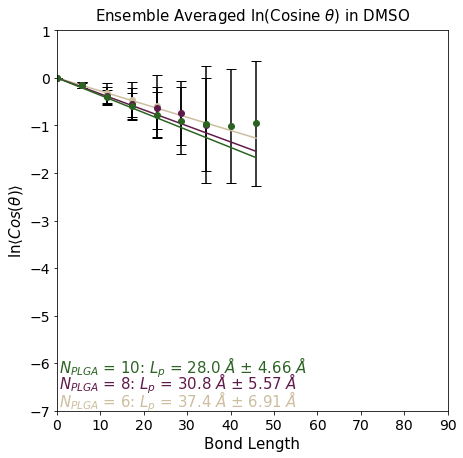

In [113]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10dmso, np.log(cor_n10plga_dmso[0]), yerr=mk_n10p_dmso, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10dmso, gg_n6plga_n10dmso, color='#CCBE9F')
plt.plot(blen_n10dmso, gg_n8plga_n10dmso, color='#601A4A')
plt.plot(blen_n10dmso, gg_n10plga_dmso, color='#2B6322')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in DMSO', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,90)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 37.4 $\AA$ ± 6.91 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.8 $\AA$ ± 5.57 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.20,r'$N_{PLGA}$ = 10: $L_{p}$ = 28.0 $\AA$ ± 4.66 $\AA$', fontsize=15, color='#2B6322')

In [114]:
rgplga_olig_dmso[r"$R_{g}$ [Angstrom] N = 10 PLGA DMSO"] = n10_blksplga_dmso["Avg Radius of gyration"]
rgplga_olig_dmso

,$R_{g}$ [Angstrom] N = 6 PLGA DMSO,$R_{g}$ [Angstrom] N = 8 PLGA DMSO,$R_{g}$ [Angstrom] N = 10 PLGA DMSO
0,7.989397,8.970195,9.078778
1,6.970289,9.819166,9.652229
2,7.749726,8.293361,8.069390
3,7.566029,8.912474,10.535148
4,8.045482,7.766943,9.701611


In [115]:
pers_plgat_dmso[r"$L_{p}$ [Angstrom] N = 10 PLGA DMSO "] = n10_blksplga_dmso["Avg persistence length"]
pers_plgat_dmso

,$L_{p}$ [Angstrom] N = 6 PLGA DMSO,$L_{p}$ [Angstrom] N = 8 PLGA DMSO,$L_{p}$ [Angstrom] N = 10 PLGA DMSO
0,41.431109,31.995460,25.066873
1,27.965706,39.314315,26.036077
2,36.288427,29.332022,23.352691
3,33.348272,31.320345,36.541487
4,48.152321,21.915798,29.157363


### N = 20 PLGA/DMSO 

In [116]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_plga_dmso = mda.Universe("n20plga_dmso/n20plgaonly_dmso.pdb", "n20plga_dmso/nodmso_n20plga.xtc")

In [117]:
n20_plga_dmso.trajectory

<XTCReader n20plga_dmso/nodmso_n20plga.xtc with 18001 frames of 303 atoms>

In [118]:
len(n20_plga_dmso.trajectory)

18001

In [119]:
#Select the polymer heavy atoms 
plga_n20dmso = n20_plga_dmso.select_atoms("resname sPLG PLG tPLG and not type H")

In [120]:
crv_n20plga_dmso = pers_length(plga_n20dmso,20)
crv_n20plga_dmso

array([[ 1.        ,  0.86770245,  0.72229278,  0.61838845,  0.65236631,
         0.64115201,  0.62543117,  0.62280684,  0.67347515,  0.68335685,
         0.67182339,  0.63949525,  0.59033611,  0.59416293,  0.77956233,
         0.75193447,  0.78391009,  0.78255636,  0.91481414],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        , 29.80726243, 43.75589763, 51.80145427, 49.27975028,
        50.12222462, 51.28615908, 51.478604  , 47.66415165, 46.89348069,
        47.79204861, 50.24580851, 53.81913694, 53.54701794, 38.7794794 ,
        41.24177327, 38.38001298, 38.50476706, 23.8206539 ]])

In [121]:
com_bond_n20dmso = np.zeros(shape=(1,18000))
count = 0
for ts in n20_plga_dmso.trajectory[0:18000]:
    n20_mon1_dmso = n20_plga_dmso.select_atoms("resid 1")
    n20_mon2_dmso = n20_plga_dmso.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1_dmso.center_of_mass(), n20_mon2_dmso.center_of_mass(), 
                                                   box=n20_plga_dmso.trajectory.ts.dimensions)
    com_bond_n20dmso[0, count] = oo_len
    count += 1
    

In [122]:
com_bond

array([[5.76474232, 6.12020808, 6.33092829, ..., 6.67174316, 6.9020669 ,
        6.7657957 ]])

In [123]:
np.std(com_bond)

0.6924626120263444

In [124]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.736817192432176

In [125]:
np.mean(com_bond_n20dmso)

5.798637250623501

In [126]:
np.std(com_bond_n20dmso)

0.6414248737163876

### Radius of Gyration vs. time N = 20 PLGA/DMSO system

In [127]:
n20plga_rgens_dmso, cor_n20plga_dmso, N20plga_cos_dmso, rgace_n20plga = get_rg_pers_poly(plga_n20dmso, n20_plga_dmso, 0, 18000)

In [128]:
n20plga_rgens_dmso[0].shape

(18000,)

In [129]:
cor_n20plga_dmso[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [130]:
N20plga_cos_dmso

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.86770245,  0.86449899,  0.85709947, ...,  0.84036642,
         0.84227529,  0.84279553],
       [ 0.72229278,  0.70696127,  0.71634069, ...,  0.61182681,
         0.63350522,  0.62036385],
       ...,
       [ 0.78391009,  0.79413257,  0.80087434, ...,  0.00847492,
         0.01312229,  0.04758092],
       [ 0.78255636,  0.72597007,  0.73816272, ..., -0.53366104,
        -0.51622724, -0.52262538],
       [ 0.91481414,  0.85826143,  0.91921285, ..., -0.64525229,
        -0.77323491, -0.77526118]])

In [131]:
rgace_n20plga

15.854178017379402

In [132]:
np.std(n20plga_rgens_dmso)

2.94565956674708

(0.2, 3)

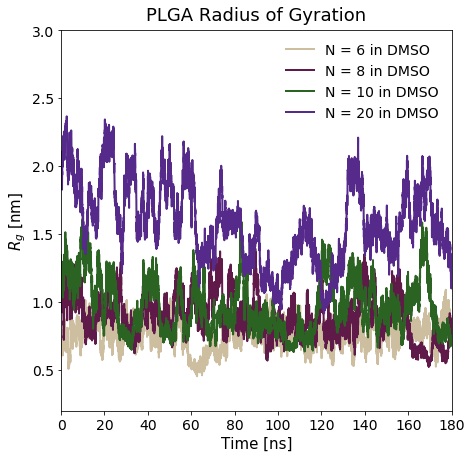

In [133]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_dmso[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_dmso[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_dmso[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_dmso[0]/10,linewidth=2, color='#562A8B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in DMSO','N = 8 in DMSO','N = 10 in DMSO','N = 20 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 20 PLGA/DMSO

In [154]:
# x values
blen_n20dmso = cor_n20plga_dmso[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n20dmso

array([  0.        ,   5.73681719,  11.47363438,  17.21045158,
        22.94726877,  28.68408596,  34.42090315,  40.15772035,
        45.89453754,  51.63135473,  57.36817192,  63.10498912,
        68.84180631,  74.5786235 ,  80.31544069,  86.05225789,
        91.78907508,  97.52589227, 103.26270946])

In [135]:
# Error propagation into semi-log data
mk_n20p_dmso = cor_n20plga_dmso[1]/cor_n20plga_dmso[0]
mk_n20p_dmso

array([2.18312497e-17, 3.18375430e-02, 1.00200610e-01, 1.47566150e-01,
       1.83920576e-01, 2.27258617e-01, 2.89831842e-01, 3.43972354e-01,
       4.16106875e-01, 5.05866008e-01, 6.36072872e-01, 7.89208240e-01,
       9.53261189e-01, 1.10023789e+00, 1.18839279e+00, 1.44165611e+00,
       1.79984413e+00, 2.05759934e+00, 2.66160750e+00])

<ErrorbarContainer object of 3 artists>

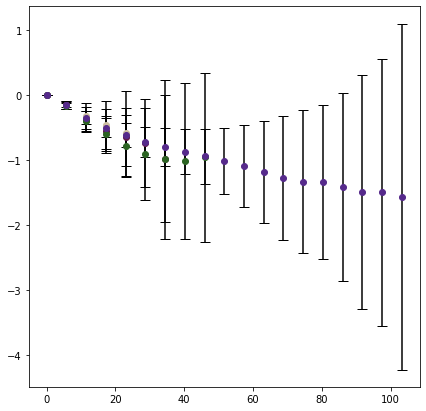

In [136]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10dmso, np.log(cor_n10plga_dmso[0]), yerr=mk_n10p_dmso, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20dmso, np.log(cor_n20plga_dmso[0]), yerr=mk_n20p_dmso, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [137]:
# All the points give the best fits for N = 10 plga in DMSO
n20_blksplga_dmso , n20plga_lpdmso = bavg_pers_cnt(5, plga_n20dmso, n20_plga_dmso, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 41.63649456305293
Error in Lp from fit [Angstroms], 95% CL : 0.3853302256433154
R2 score: 0.9914123823405977
6000
9000
Lp [Angstroms]: 37.14008623166832
Error in Lp from fit [Angstroms], 95% CL : 0.3356283943603894
R2 score: 0.9917745357117339
9000
12000


/Users/cnyambura/Simulations_2019/ikt_sims/BSA_poly_sys/PLGA_new_sims/plga_dmso/polymer_MD_analysis.py:312: RuntimeWarning: invalid value encountered in log
  npoly_lc = np.log(cor_tp[0])


Lp [Angstroms]: 34.15165803778778
Error in Lp from fit [Angstroms], 95% CL : 0.26333884768089166
R2 score: 0.9940865437047403
12000
15000
Lp [Angstroms]: 28.798964700933634
Error in Lp from fit [Angstroms], 95% CL : 0.4248959678933263
R2 score: 0.9783915391311583
15000
18000
Lp [Angstroms]: 32.15930959458232
Error in Lp from fit [Angstroms], 95% CL : 0.23152852663179613
R2 score: 0.9952811318455993


In [138]:
n20_blksplga_dmso

{'Avg Radius of gyration': array([17.85449078, 14.9122174 , 12.89581585, 14.86621853, 15.96303733]),
 'Avg persistence length': array([41.63649456, 37.14008623, 34.15165804, 28.7989647 , 32.15930959])}

In [139]:
n20plga_lpdmso

array([[ 4.16364946e+01,  3.71400862e+01,  3.41516580e+01,
         2.87989647e+01,  3.21593096e+01],
       [ 3.85330226e-01,  3.35628394e-01,  2.63338848e-01,
         4.24895968e-01,  2.31528527e-01],
       [-2.40173917e-02, -2.69250856e-02, -2.92811552e-02,
        -3.47234705e-02, -3.10951949e-02],
       [ 3.16602290e-04,  3.79393854e-04,  3.26683516e-04,
         1.68190805e-03,  3.21163869e-04]])

In [140]:
n20plga_lpdmso[2]

array([-0.02401739, -0.02692509, -0.02928116, -0.03472347, -0.03109519])

In [141]:
np.mean(n20plga_lpdmso[3])

0.0006051503160101856

In [142]:
blen_n20dmso

array([  0.        ,   5.73681719,  11.47363438,  17.21045158,
        22.94726877,  28.68408596,  34.42090315,  40.15772035,
        45.89453754,  51.63135473,  57.36817192,  63.10498912,
        68.84180631,  74.5786235 ,  80.31544069,  86.05225789,
        91.78907508,  97.52589227, 103.26270946])

In [143]:
gg_n20plga_dmso = line_fit(np.mean(n20plga_lpdmso[2]),blen_n20dmso)

In [144]:
gg_n6plga_n20dmso = line_fit(np.mean(n6plga_lpdmso[2]),blen_n20dmso)

In [145]:
gg_n8plga_n20dmso = line_fit(np.mean(n8plga_lpdmso[2]),blen_n20dmso)

In [146]:
gg_n10plga_n20dmso = line_fit(np.mean(n10plga_lpdmso[2]),blen_n20dmso)

In [147]:
gg_n20plga_dmso

array([-0.        , -0.16756359, -0.33512719, -0.50269078, -0.67025437,
       -0.83781797, -1.00538156, -1.17294515, -1.34050874, -1.50807234,
       -1.67563593, -1.84319952, -2.01076312, -2.17832671, -2.3458903 ,
       -2.5134539 , -2.68101749, -2.84858108, -3.01614468])

### Block averaged Radius of gyration and persistence length, N = 20 PLGA/DMSO

In [148]:
np.mean(n20_blksplga_dmso["Avg persistence length"])

34.777302625604996

In [149]:
np.std(n20_blksplga_dmso["Avg persistence length"])

4.373033350116244

In [150]:
np.mean(n20_blksplga_dmso["Avg Radius of gyration"])

15.29835597972181

In [151]:
np.std(n20_blksplga_dmso["Avg Radius of gyration"])

1.6176322978432816

Text(0.5, -5.75, '$N_{PLGA}$ = 20: $L_{p}$ = 34.8 $\\AA$ ± 4.37 $\\AA$')

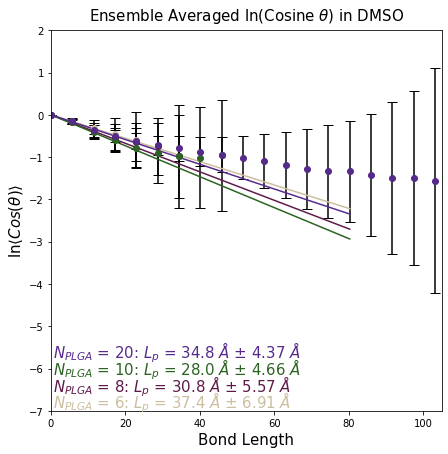

In [170]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10dmso, np.log(cor_n10plga_dmso[0]), yerr=mk_n10p_dmso, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20dmso, np.log(cor_n20plga_dmso[0]), yerr=mk_n20p_dmso, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20dmso[:15], gg_n6plga_n20dmso[:15], color='#CCBE9F')
plt.plot(blen_n20dmso[:15], gg_n8plga_n20dmso[:15], color='#601A4A')
plt.plot(blen_n20dmso[:15], gg_n10plga_n20dmso[:15], color='#2B6322')
plt.plot(blen_n20dmso[:15], gg_n20plga_dmso[:15], color='#562A8B')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in DMSO', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,2)
plt.xlim(0,105)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
#plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 37.4 $\AA$ ± 6.91 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.8 $\AA$ ± 5.57 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 28.0 $\AA$ ± 4.66 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.75,r'$N_{PLGA}$ = 20: $L_{p}$ = 34.8 $\AA$ ± 4.37 $\AA$', fontsize=15, color='#562A8B')

In [171]:
rgplga_olig_dmso[r"$R_{g}$ [Angstrom] N = 20 PLGA DMSO"] = n20_blksplga_dmso["Avg Radius of gyration"]
rgplga_olig_dmso

,$R_{g}$ [Angstrom] N = 6 PLGA DMSO,$R_{g}$ [Angstrom] N = 8 PLGA DMSO,$R_{g}$ [Angstrom] N = 10 PLGA DMSO,$R_{g}$ [Angstrom] N = 20 PLGA DMSO
0,7.989397,8.970195,9.078778,17.854491
1,6.970289,9.819166,9.652229,14.912217
2,7.749726,8.293361,8.069390,12.895816
3,7.566029,8.912474,10.535148,14.866219
4,8.045482,7.766943,9.701611,15.963037


In [172]:
pers_plgat_dmso[r"$L_{p}$ [Angstrom] N = 20 PLGA DMSO "] = n20_blksplga_dmso["Avg persistence length"]
pers_plgat_dmso

,$L_{p}$ [Angstrom] N = 6 PLGA DMSO,$L_{p}$ [Angstrom] N = 8 PLGA DMSO,$L_{p}$ [Angstrom] N = 10 PLGA DMSO,$L_{p}$ [Angstrom] N = 20 PLGA DMSO
0,41.431109,31.995460,25.066873,41.636495
1,27.965706,39.314315,26.036077,37.140086
2,36.288427,29.332022,23.352691,34.151658
3,33.348272,31.320345,36.541487,28.798965
4,48.152321,21.915798,29.157363,32.159310


### N = 30 PLGA/DMSO 

In [173]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_plga_dmso = mda.Universe("n30plga_dmso/n30plgaonly_dmso.pdb", "n30plga_dmso/nodmso_n30plga.xtc")

In [174]:
n30_plga_dmso.trajectory

<XTCReader n30plga_dmso/nodmso_n30plga.xtc with 18001 frames of 453 atoms>

In [175]:
len(n30_plga_dmso.trajectory)

18001

In [176]:
#Select the polymer heavy atoms 
plga_n30dmso = n30_plga_dmso.select_atoms("resname sPLG PLG tPLG and not type H")

In [177]:
crv_n30plga_dmso = pers_length(plga_n30dmso,30)
crv_n30plga_dmso

array([[ 1.        ,  0.84981132,  0.6688501 ,  0.5789477 ,  0.54042076,
         0.49758897,  0.47146998,  0.47126926,  0.48410544,  0.52155074,
         0.572501  ,  0.6249179 ,  0.59472549,  0.55742371,  0.52101317,
         0.49715315,  0.5128475 ,  0.58198501,  0.57923088,  0.59860029,
         0.67085745,  0.70511638,  0.69768439,  0.74886742,  0.77430345,
         0.73686064,  0.73789242,  0.89362823,  0.8118841 ],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        , 19.        ,
        20.        , 21.        , 22.        , 23.        , 24.        ,
        25.        , 26.        , 27.        , 28.        ],
       [ 0.        , 31.80884667, 48.02162304, 54.62343651, 57.28771334,
        60.15938475, 61.87024139, 61.88328148, 61.04612007, 58.56367033,
  

In [178]:
com_bond_n30dmso = np.zeros(shape=(1,18000))
count = 0
for ts in n30_plga_dmso.trajectory[0:18000]:
    n30_mon1_dmso = n30_plga_dmso.select_atoms("resid 1")
    n30_mon2_dmso = n30_plga_dmso.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1_dmso.center_of_mass(), n30_mon2_dmso.center_of_mass(), 
                                                   box=n30_plga_dmso.trajectory.ts.dimensions)
    com_bond_n30dmso[0, count] = oo_len
    count += 1
    

In [179]:
com_bond

array([[5.76474232, 6.12020808, 6.33092829, ..., 6.67174316, 6.9020669 ,
        6.7657957 ]])

In [180]:
np.std(com_bond)

0.6924626120263444

In [181]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.736817192432176

In [182]:
np.mean(com_bond_n30dmso)

5.716248941878295

In [183]:
np.std(com_bond_n30dmso)

0.7265283347026412

### Radius of Gyration vs. time N = 30 PLGA/DMSO system

In [184]:
n30plga_rgens_dmso, cor_n30plga_dmso, N30plga_cos_dmso, rgace_n30plga = get_rg_pers_poly(plga_n30dmso, n30_plga_dmso, 0, 18000)

In [185]:
n30plga_rgens_dmso[0].shape

(18000,)

In [186]:
cor_n30plga_dmso[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [187]:
N30plga_cos_dmso

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.84981132, 0.84188727, 0.84677897, ..., 0.84637581, 0.85032134,
        0.85030163],
       [0.6688501 , 0.66457949, 0.66992648, ..., 0.65660089, 0.6634286 ,
        0.66154485],
       ...,
       [0.73789242, 0.76499085, 0.7781883 , ..., 0.64095834, 0.59187983,
        0.58837435],
       [0.89362823, 0.92850502, 0.91383974, ..., 0.53602078, 0.50549504,
        0.5145474 ],
       [0.8118841 , 0.86196073, 0.82912356, ..., 0.45604657, 0.33869294,
        0.30043579]])

In [188]:
rgace_n30plga

20.062008472498107

In [189]:
np.std(n30plga_rgens_dmso)

3.6924204925051347

In [237]:
np.save('n6plga_dmsoRg.npy', n6plga_rgens_dmso[0])
np.save('n8plga_dmsoRg.npy', n8plga_rgens_dmso[0])
np.save('n10plga_dmsoRg.npy', n10plga_rgens_dmso[0])
np.save('n20plga_dmsoRg.npy', n20plga_rgens_dmso[0])
np.save('n30plga_dmsoRg.npy', n30plga_rgens_dmso[0])

(0.2, 4)

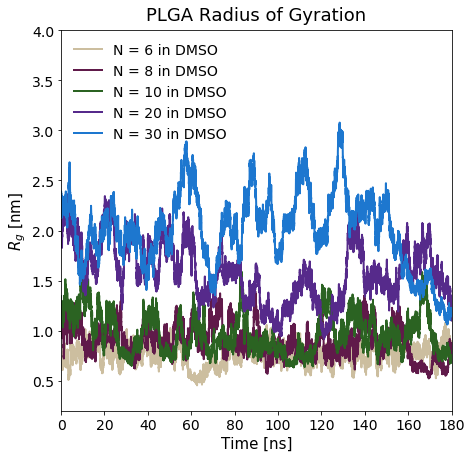

In [214]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_dmso[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_dmso[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_dmso[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_dmso[0]/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, n30plga_rgens_dmso[0]/10,linewidth=2, color='#1D77CF')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in DMSO','N = 8 in DMSO','N = 10 in DMSO','N = 20 in DMSO','N = 30 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,4)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 30 PLGA/DMSO

In [191]:
# x values
blen_n30dmso = cor_n30plga_dmso[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n30dmso

array([  0.        ,   5.73681719,  11.47363438,  17.21045158,
        22.94726877,  28.68408596,  34.42090315,  40.15772035,
        45.89453754,  51.63135473,  57.36817192,  63.10498912,
        68.84180631,  74.5786235 ,  80.31544069,  86.05225789,
        91.78907508,  97.52589227, 103.26270946, 108.99952666,
       114.73634385, 120.47316104, 126.20997823, 131.94679543,
       137.68361262, 143.42042981, 149.157247  , 154.8940642 ,
       160.63088139])

In [192]:
# Error propagation into semi-log data
mk_n30p_dmso = cor_n30plga_dmso[1]/cor_n30plga_dmso[0]
mk_n30p_dmso

array([3.41191684e-18, 2.27645377e-02, 6.70378505e-02, 1.13204091e-01,
       1.48250028e-01, 1.88160331e-01, 2.13994367e-01, 2.41856873e-01,
       2.85761885e-01, 3.44906619e-01, 3.90597186e-01, 4.68082673e-01,
       5.16151046e-01, 5.63860587e-01, 5.68101757e-01, 5.81583528e-01,
       6.11694295e-01, 6.88878566e-01, 7.20605075e-01, 7.00308786e-01,
       7.18474328e-01, 7.92397655e-01, 8.94074370e-01, 1.03841250e+00,
       1.19312195e+00, 1.30106875e+00, 1.47752111e+00, 1.64966065e+00,
       2.31461119e+00])

<ErrorbarContainer object of 3 artists>

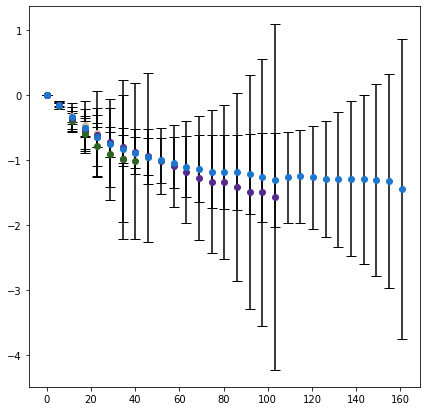

In [193]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10dmso, np.log(cor_n10plga_dmso[0]), yerr=mk_n10p_dmso, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20dmso, np.log(cor_n20plga_dmso[0]), yerr=mk_n20p_dmso, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30dmso, np.log(cor_n30plga_dmso[0]), yerr=mk_n30p_dmso, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [194]:
# All the points give the best fits for N = 10 plga in DMSO
n30_blksplga_dmso , n30plga_lpdmso = bavg_pers_cnt(5, plga_n30dmso, n30_plga_dmso, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 29.7596158822288
Error in Lp from fit [Angstroms], 95% CL : 0.09570859516672632
R2 score: 0.9959553407278264
6000
9000


/Users/cnyambura/Simulations_2019/ikt_sims/BSA_poly_sys/PLGA_new_sims/plga_dmso/polymer_MD_analysis.py:312: RuntimeWarning: invalid value encountered in log
  npoly_lc = np.log(cor_tp[0])


Lp [Angstroms]: 34.38635331204867
Error in Lp from fit [Angstroms], 95% CL : 0.09498084472806505
R2 score: 0.9970128538760575
9000
12000
Lp [Angstroms]: 39.6099915594847
Error in Lp from fit [Angstroms], 95% CL : 0.2301746974296389
R2 score: 0.9856279291065875
12000
15000
Lp [Angstroms]: 40.19497519960764
Error in Lp from fit [Angstroms], 95% CL : 0.14285676879286868
R2 score: 0.9947669207297755
15000
18000
Lp [Angstroms]: 34.05873852516946
Error in Lp from fit [Angstroms], 95% CL : 0.08309257313736572
R2 score: 0.9976668325993079


In [195]:
n30_blksplga_dmso

{'Avg Radius of gyration': array([20.41207189, 20.47842015, 21.62141855, 22.74753821, 15.27873774]),
 'Avg persistence length': array([29.75961588, 34.38635331, 39.60999156, 40.1949752 , 34.05873853])}

In [196]:
n30plga_lpdmso

array([[ 2.97596159e+01,  3.43863533e+01,  3.96099916e+01,
         4.01949752e+01,  3.40587385e+01],
       [ 9.57085952e-02,  9.49808447e-02,  2.30174697e-01,
         1.42856769e-01,  8.30925731e-02],
       [-3.36025843e-02, -2.90813042e-02, -2.52461553e-02,
        -2.48787316e-02, -2.93610405e-02],
       [ 3.09434126e-04,  1.70963414e-04,  5.70258508e-04,
         2.07152508e-04,  1.35952060e-04]])

In [197]:
n30plga_lpdmso[2]

array([-0.03360258, -0.0290813 , -0.02524616, -0.02487873, -0.02936104])

In [198]:
np.mean(n30plga_lpdmso[3])

0.0002787521233491621

In [199]:
blen_n30dmso

array([  0.        ,   5.73681719,  11.47363438,  17.21045158,
        22.94726877,  28.68408596,  34.42090315,  40.15772035,
        45.89453754,  51.63135473,  57.36817192,  63.10498912,
        68.84180631,  74.5786235 ,  80.31544069,  86.05225789,
        91.78907508,  97.52589227, 103.26270946, 108.99952666,
       114.73634385, 120.47316104, 126.20997823, 131.94679543,
       137.68361262, 143.42042981, 149.157247  , 154.8940642 ,
       160.63088139])

In [200]:
gg_n30plga_dmso = line_fit(np.mean(n30plga_lpdmso[2]),blen_n30dmso)

In [201]:
gg_n6plga_n30dmso = line_fit(np.mean(n6plga_lpdmso[2]),blen_n30dmso)

In [202]:
gg_n8plga_n30dmso = line_fit(np.mean(n8plga_lpdmso[2]),blen_n30dmso)

In [203]:
gg_n10plga_n30dmso = line_fit(np.mean(n10plga_lpdmso[2]),blen_n30dmso)

In [204]:
gg_n20plga_n30dmso = line_fit(np.mean(n20plga_lpdmso[2]),blen_n30dmso)

In [205]:
gg_n30plga_dmso

array([-0.        , -0.16312045, -0.3262409 , -0.48936135, -0.65248179,
       -0.81560224, -0.97872269, -1.14184314, -1.30496359, -1.46808404,
       -1.63120449, -1.79432494, -1.95744538, -2.12056583, -2.28368628,
       -2.44680673, -2.60992718, -2.77304763, -2.93616808, -3.09928853,
       -3.26240897, -3.42552942, -3.58864987, -3.75177032, -3.91489077,
       -4.07801122, -4.24113167, -4.40425212, -4.56737256])

### Block averaged Radius of gyration and persistence length, N = 30 PLGA/DMSO

In [206]:
np.mean(n30_blksplga_dmso["Avg persistence length"])

35.601934895707856

In [207]:
np.std(n30_blksplga_dmso["Avg persistence length"])

3.876914302202897

In [208]:
np.mean(n30_blksplga_dmso["Avg Radius of gyration"])

20.107637308347186

In [209]:
np.std(n30_blksplga_dmso["Avg Radius of gyration"])

2.5616026941260883

Text(0.5, -5.3, '$N_{PLGA}$ = 30: $L_{p}$ = 35.6 $\\AA$ ± 3.88 $\\AA$')

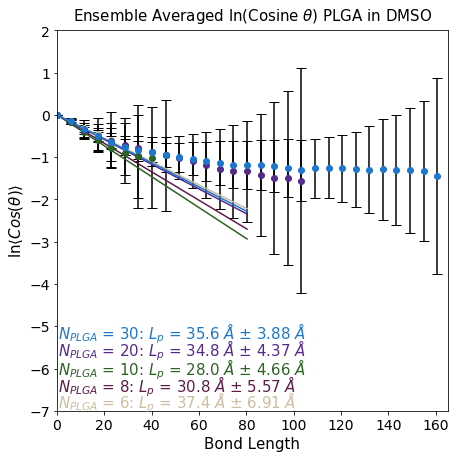

In [236]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_dmso, np.log(cor_n6plga_dmso[0]), yerr=mk_n6p_dmso, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8dmso, np.log(cor_n8plga_dmso[0]), yerr=mk_n8p_dmso, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10dmso, np.log(cor_n10plga_dmso[0]), yerr=mk_n10p_dmso, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20dmso, np.log(cor_n20plga_dmso[0]), yerr=mk_n20p_dmso, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30dmso, np.log(cor_n30plga_dmso[0]), yerr=mk_n30p_dmso, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30dmso[:15], gg_n6plga_n30dmso[:15], color='#CCBE9F')
plt.plot(blen_n30dmso[:15], gg_n8plga_n30dmso[:15], color='#601A4A')
plt.plot(blen_n30dmso[:15], gg_n10plga_n30dmso[:15], color='#2B6322')
plt.plot(blen_n30dmso[:15], gg_n20plga_n30dmso[:15], color='#562A8B')
plt.plot(blen_n30dmso[:15], gg_n30plga_dmso[:15], color='#1D77CF')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA in DMSO', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,2)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 37.4 $\AA$ ± 6.91 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.8 $\AA$ ± 5.57 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 28.0 $\AA$ ± 4.66 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 34.8 $\AA$ ± 4.37 $\AA$', fontsize=15, color='#562A8B')
plt.text(0.5, -5.30,r'$N_{PLGA}$ = 30: $L_{p}$ = 35.6 $\AA$ ± 3.88 $\AA$', fontsize=15, color='#1D77CF')

In [211]:
rgplga_olig_dmso[r"$R_{g}$ [Angstrom] N = 30 PLGA DMSO"] = n30_blksplga_dmso["Avg Radius of gyration"]
rgplga_olig_dmso

,$R_{g}$ [Angstrom] N = 6 PLGA DMSO,$R_{g}$ [Angstrom] N = 8 PLGA DMSO,$R_{g}$ [Angstrom] N = 10 PLGA DMSO,$R_{g}$ [Angstrom] N = 20 PLGA DMSO,$R_{g}$ [Angstrom] N = 30 PLGA DMSO
0,7.989397,8.970195,9.078778,17.854491,20.412072
1,6.970289,9.819166,9.652229,14.912217,20.478420
2,7.749726,8.293361,8.069390,12.895816,21.621419
3,7.566029,8.912474,10.535148,14.866219,22.747538
4,8.045482,7.766943,9.701611,15.963037,15.278738


In [212]:
pers_plgat_dmso[r"$L_{p}$ [Angstrom] N = 30 PLGA DMSO "] = n30_blksplga_dmso["Avg persistence length"]
pers_plgat_dmso

,$L_{p}$ [Angstrom] N = 6 PLGA DMSO,$L_{p}$ [Angstrom] N = 8 PLGA DMSO,$L_{p}$ [Angstrom] N = 10 PLGA DMSO,$L_{p}$ [Angstrom] N = 20 PLGA DMSO,$L_{p}$ [Angstrom] N = 30 PLGA DMSO
0,41.431109,31.995460,25.066873,41.636495,29.759616
1,27.965706,39.314315,26.036077,37.140086,34.386353
2,36.288427,29.332022,23.352691,34.151658,39.609992
3,33.348272,31.320345,36.541487,28.798965,40.194975
4,48.152321,21.915798,29.157363,32.159310,34.058739


In [216]:
rgplga_olig_dmso.to_pickle("PLGA_DMSO_Rg.pkl")

In [217]:
pers_plgat_dmso.to_pickle("PLGA_DMSO_Lp.pkl")

### Fluory Exponent, PLGA/DMSO systems 

In [218]:
n_plga = np.array([6,8,10,20,30])
rg_nplga_dmso = np.array([np.mean(n6_blksplga_dmso["Avg Radius of gyration"])
                    ,np.mean(n8_blksplga_dmso["Avg Radius of gyration"]),np.mean(n10_blksplga_dmso["Avg Radius of gyration"])
                    ,np.mean(n20_blksplga_dmso["Avg Radius of gyration"]),np.mean(n30_blksplga_dmso["Avg Radius of gyration"])])

In [219]:
rg_nplga_dmso

array([ 7.66418458,  8.75242794,  9.40743106, 15.29835598, 20.10763731])

In [220]:
rgdmso_nplga_std = np.array([np.std(np.log10(n6_blksplga_dmso["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blksplga_dmso["Avg Radius of gyration"]))
                        ,np.std(np.log10(n10_blksplga_dmso["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blksplga_dmso["Avg Radius of gyration"]))
                        ,np.std(np.log10(n30_blksplga_dmso["Avg Radius of gyration"]))])
rgdmso_nplga_std

array([0.02245878, 0.03435137, 0.03843184, 0.046038  , 0.06019604])

In [221]:
n_plga

array([ 6,  8, 10, 20, 30])

In [222]:
np.log10(rg_nplga_dmso)

array([0.88446596, 0.94212854, 0.97347104, 1.18464476, 1.30336104])

In [223]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [224]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vpdmso = LinearRegression(fit_intercept=True)
model_vpdmso.fit(np.log10(n_plga).reshape(-1,1), np.log10(rg_nplga_dmso))
# Slope here is in nanometers
print("Model slope:    ", model_vpdmso.coef_[0])
print("Model intercept:", model_vpdmso.intercept_)

Model slope:     0.6128401415750979
Model intercept: 0.3884672968106906


In [225]:
gg_dmso = model_vpdmso.predict(np.log10(n_plga.reshape(-1,1)))
gg_dmso

array([0.86534962, 0.94191709, 1.00130744, 1.1857907 , 1.2937065 ])

In [226]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_nplga_dmso), gg_dmso))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_nplga_dmso), gg_dmso))

Mean Std Error: 0.00024697346465761685
R2 score: 0.990270935443047


In [227]:
# Residuals between the true y data and model y data 
resid_vdmso = np.log10(rg_nplga_dmso) - gg_dmso
resid_vdmso

array([ 0.01911634,  0.00021145, -0.02783639, -0.00114594,  0.00965455])

In [229]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttdmso = np.log10(n_plga)
nt_ttdmso -= np.mean(nt_ttdmso)
nhui_dmso = nt_ttdmso**2
np.sum(nhui_dmso)

0.334663876760361

In [230]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [231]:
# How to calculate 95% confidence interval for the slope 
flc_vdmso = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vdmso**2)/len(resid_vdmso))/(np.sum(nhui_dmso)))
flc_vdmso

0.07542404492184158

Text(1.1, 1, '$v_{DMSO}$ = 0.61 ± 0.08')

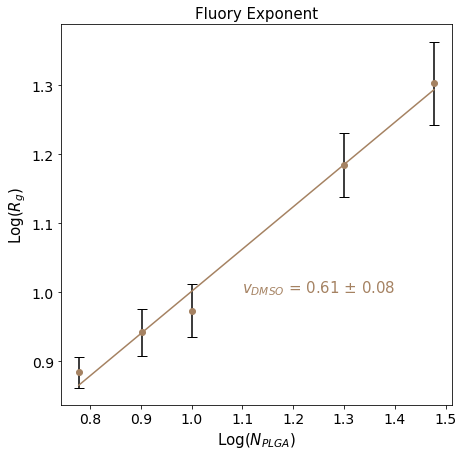

In [233]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_plga), np.log10(rg_nplga_dmso), yerr=rgdmso_nplga_std, color='#A58262', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_plga), gg_dmso, color='#A58262')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PLGA}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 1, r'$v_{DMSO}$ = 0.61 ± 0.08', fontsize=15, color='#A58262')